1.	Try the following Python code to plot sine wave using Matplotlib.

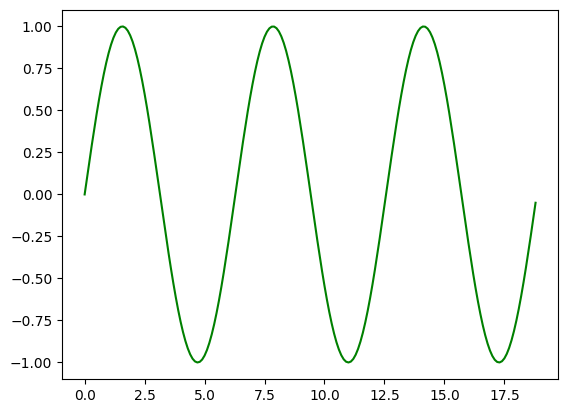

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,6*np.pi,0.1)
y = np.sin(x)

plt.plot(x,y,color="green")
plt.show()

2.	Try plotting the following signals in the same way as in Q1 [Hint: You may need SciPy]


        i.	Cosine wave 

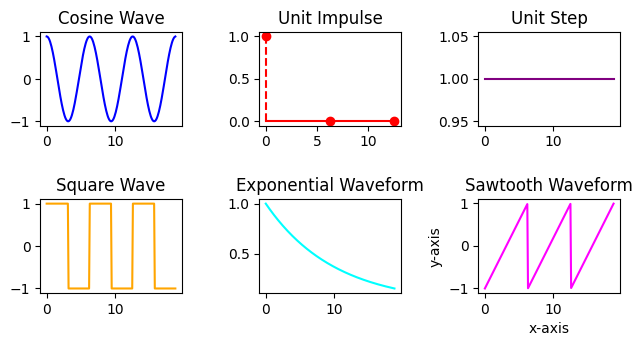

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Creating x axis with range
x = np.arange(0, 6*np.pi, 0.1)

# Cosine wave
y_cos = np.cos(x)

# Unit impulse
x_impulse = np.arange(0, 6*np.pi, 2*np.pi)
y_impulse = np.zeros_like(x_impulse)
y_impulse[::int(2*np.pi/0.1)] = 1  # Set impulse at every 2*pi interval

# Unit step wave
y_step = np.heaviside(x, 1)

# Square wave
y_square = signal.square(x)

# Exponential waveform
y_exponential = np.exp(-0.1 * x)

# Sawtooth waveform
y_sawtooth = signal.sawtooth(x)

# Plotting Sine and Cosine Waves
plt.subplot(3,3,1)
plt.plot(x, y_cos, label='Cosine', color='blue')
plt.title('Cosine Wave')
plt.subplot(3,3,2)
plt.stem(x_impulse, y_impulse, label='Unit Impulse', markerfmt='ro', linefmt='r--', basefmt='r')
plt.title('Unit Impulse')
plt.subplot(3,3,3)
plt.step(x, y_step, label='Unit Step', where='post', color='purple')
plt.title('Unit Step')
plt.subplot(3,3,4)
plt.plot(x, y_square, label='Square Wave', color='orange')
plt.title('Square Wave')
plt.subplot(3,3,5)
plt.plot(x, y_exponential, label='Exponential Waveform', color='cyan')
plt.title('Exponential Waveform')
plt.subplot(3,3,6)
plt.plot(x, y_sawtooth, label='Sawtooth Waveform', color='magenta')
plt.title('Sawtooth Waveform')

# Adding labels and legend
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Adjust layout to prevent clipping of titles
plt.tight_layout(h_pad=2, w_pad=2)

# Display the plot
plt.show()

3.	Let’s generate an audio signal. Explore the following code (Ex. Try varying the sample rate and see what happens).

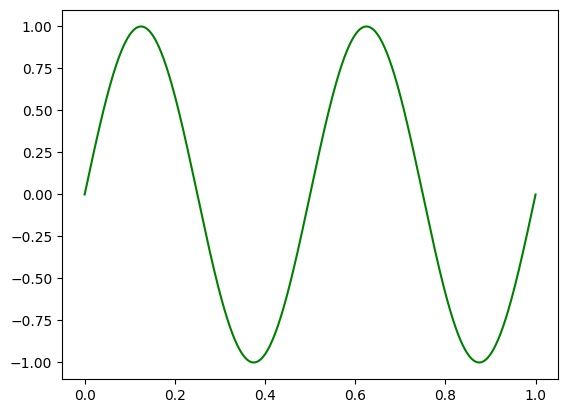

CPU times: user 270 ms, sys: 6.17 ms, total: 277 ms
Wall time: 95.1 ms


In [3]:
%%time
SAMPLE_RATE = 44100
DURATION = 1


def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate*duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y
x,y = generate_sine_wave(2,sample_rate=SAMPLE_RATE,duration=DURATION)
plt.plot(x,y,color="green")
plt.show()

4.	Now use generate_sine_wave() to generate two signals. How would you change pitch of the signal?

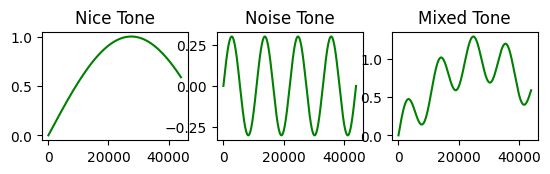

In [4]:
_,nice_tone = generate_sine_wave(0.4,sample_rate=SAMPLE_RATE,duration=DURATION) #frenquency = 0.4
_,noise_tone = generate_sine_wave(4,sample_rate=SAMPLE_RATE,duration=DURATION) #frenquency = 4
noise_tone = noise_tone * 0.3
mixed_tone = nice_tone + noise_tone

plt.subplot(3,3,1)
plt.title("Nice Tone")
plt.plot(nice_tone,color="green")
# plt.show()

plt.subplot(3,3,2)
plt.title("Noise Tone")
plt.plot(noise_tone,color="green")
# plt.show()

plt.subplot(3,3,3)
plt.title("Mixed Tone")
plt.plot(mixed_tone,color="green")
# plt.show()



5.	If you want, you can normalize and save it using the following code snippet [Optional].

In [5]:
from scipy.io.wavfile import write

normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
write("sine_wave.wav",SAMPLE_RATE,normalized_tone)


# Normalization makes it from 0 to 1. takes max value and divide all values by it
# 1323, 131,4325, 5325
# 5325/5325, 4325/5325, 131/5325, 1323/5325

6.	Now, let’s implement the fourier transform. [Explore the functions fft() and fftfreq() in detail]

/opt/homebrew/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


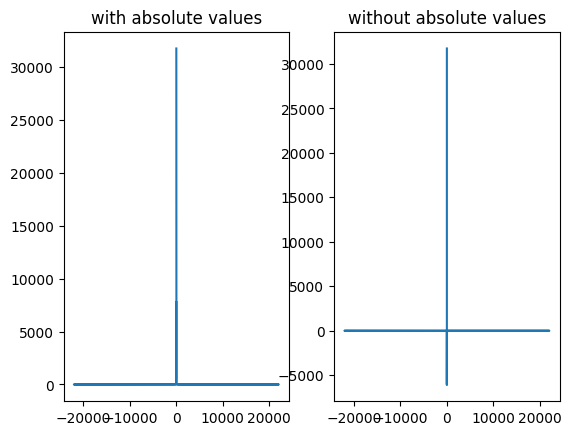

In [6]:
from scipy.fft import fft, fftfreq

sample_rate = 44100
duration = 1

N = sample_rate * duration

mixed_tone = np.array(mixed_tone)

yf = fft(mixed_tone)
xf = fftfreq(N,1/sample_rate)

plt.subplot(1,2,1)
plt.title("with absolute values")
plt.plot(xf,np.abs(yf))
# plt.show()

plt.subplot(1,2,2)
plt.title("without absolute values")
plt.plot(xf,yf)
# plt.show()

7.	Use the function ifft() to reverse the operation. See how it reproduces the original signal.

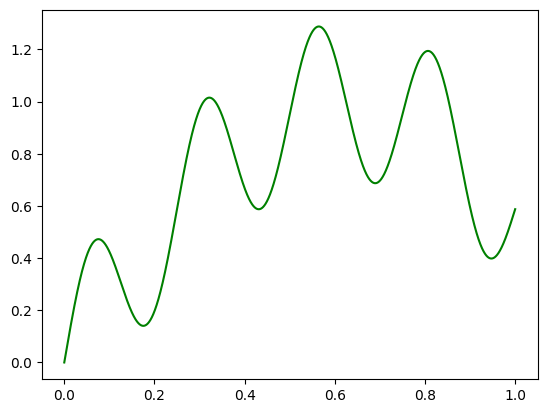

In [8]:
from scipy.fft import ifft

# apply inverse Fourier transform
reproduced_signal = ifft(yf)

# plot the reproduced signal
plt.plot(x, reproduced_signal.real, color='green')
plt.show()
